In [1]:
from JupyterDock.Preparation import SanitizeProtein, SanitizeLigands

from JupyterDock.Docking import Docker

from JupyterDock.Analysis import VisualizeDocking

/home/angel/miniconda3/envs/JupyterDock/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


In [ ]:
ProteinSanitizer=SanitizeProtein(protein_file='files/1AZ8_clean.pdb')

In [ ]:
ProteinSanitizer.pdbfixer_sanitization()

In [ ]:
LigandSanitizer=SanitizeLigands('files/1AZ8_lig.mol2')

In [ ]:
LigandSanitizer.run_sanitization()

In [ ]:
LigandSanitizer.ligands

In [12]:
from rdkit import Chem

import datamol

[11:56:52] sanitise [11:56:52] 1AZ8: [11:58:06] 1AZ8: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.


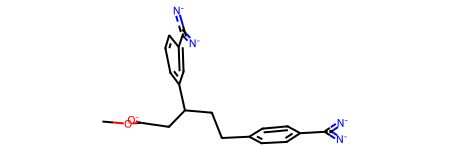

In [9]:
m=Chem.MolFromMol2File('files/1AZ8_lig.mol2',False)
m

In [24]:
mol = datamol.fix_mol(m)
mol = datamol.sanitize_mol(m,charge_neutral=True,add_hs=True)
mol = datamol.standardize_mol(m)

Chem.AllChem.Kekulize(mol,clearAromaticFlags=True)

[12:05:30] non-ring atom 1 marked aromatic
[12:05:30] DEBUG: COC(O)CC(CCc1ccc(-c(n)n)cc1)c1cccc(-c(n)n)c1 failed due to non-ring atom 1 marked aromatic

[12:05:30] non-ring atom 1 marked aromatic
[12:05:30] WARNING: not removing hydrogen atom without neighbors
[12:05:30] non-ring atom 1 marked aromatic
[12:05:30] non-ring atom 1 marked aromatic
[12:05:30] DEBUG: COC(O)CC(CCc1ccc(-c(n)n)cc1)c1cccc(-c(n)n)c1 failed due to non-ring atom 1 marked aromatic

[12:05:30] non-ring atom 1 marked aromatic
[12:05:30] Initializing Normalizer
[12:05:30] Running Normalizer
[12:05:30] non-ring atom 1 marked aromatic


AtomKekulizeException: non-ring atom 1 marked aromatic

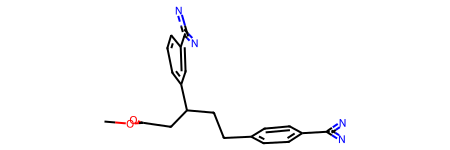

In [21]:
mol

In [23]:
Chem.MolToMolFile('files/rdkit.mol')

ArgumentError: Python argument types in
    rdkit.Chem.rdmolfiles.MolToMolFile(str)
did not match C++ signature:
    MolToMolFile(RDKit::ROMol mol, std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > filename, bool includeStereo=True, int confId=-1, bool kekulize=True, bool forceV3000=False)

In [2]:
RunDocking=Docker(receptor_file='files/1AZ8_clean_sanitized.pdb',ligands_file='files/1AZ8_lig_sanitized.mol2',selection='lig',extending=4)

In [3]:
RunDocking.run_smina()

In [ ]:
docker.smina_params

In [ ]:
docker.run_ledock()

In [ ]:
docker.ledock_params

In [ ]:
view=VisualizeDocking(receptor='files/1AZ8_clean.pdb',ligands='files/1AZ8_lig_sanitized_ledock_results.sdf',reference='files/1AZ8_lig_sanitized.mol2',pose=1)

In [ ]:
v=view.view()

In [ ]:
v.show()

In [ ]:
import MDAnalysis as mda
from MDAnalysis.coordinates import PDB

import prolif as plf
from prolif.plotting.network import LigNetwork


In [ ]:
# load protein
prot = mda.Universe("files/1AZ8_clean_sanitized.pdb")
prot = plf.Molecule.from_mda(prot)
prot.n_residues

In [ ]:
lig_suppl = list(plf.sdf_supplier('files/1AZ8_lig_sanitized_ledock_results.sdf'))

In [ ]:
fp = plf.Fingerprint()

In [ ]:
fp.run_from_iterable(lig_suppl, prot)

In [ ]:
net = LigNetwork.from_ifp(results_df,lig_suppl[0],kind="frame", frame=0,rotation=270)
net.display()